









# Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import plotly.plotly as py
import plotly.graph_objs as go

# Data Load

In [2]:
df = pd.read_csv('New Text Document.csv')

In [3]:
df.head(2)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,242.568983,0.750120,19.05989,17.49459,16.59285,16.09412,15.70741,745,301,5,560,3.890000e+17,GALAXY,0.044277,345,51690,447
1,1.240000e+18,242.594564,0.728288,19.45567,18.33084,17.67185,17.30189,17.13650,745,301,5,560,3.890000e+17,GALAXY,0.041644,345,51690,533


In [4]:
df.drop(df.columns[[0,1,2,8,9,10,11,12,13,15,16,17]], axis=1, inplace=True)

In [5]:
df.head(2)

,u,g,r,i,z,redshift
0,19.05989,17.49459,16.59285,16.09412,15.70741,0.044277
1,19.45567,18.33084,17.67185,17.30189,17.13650,0.041644


In [6]:
df.describe()

,u,g,r,i,z,redshift
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,18.639678,17.401125,16.868202,16.605008,16.443092,0.168142
std,0.833935,0.983520,1.127421,1.203896,1.277945,0.424564
min,6.752484,7.466997,8.449127,7.652014,6.485586,-0.004136
25%,18.219090,16.849210,16.188660,15.855910,15.612385,0.000055
50%,18.875100,17.519260,16.891330,16.590290,16.410520,0.052419
75%,19.273140,18.050120,17.564295,17.307345,17.186430,0.097804
max,19.600000,19.996050,31.990100,32.101780,30.846780,7.009400


In [ ]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [7]:
target = df['redshift']

In [8]:
df.drop('redshift', axis=1, inplace=True)

In [9]:
features = df

In [21]:
log_data = np.log(features)

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.05, random_state=0)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test[:500])


In [26]:
print(performance_metric(regressor.predict(X_test),y_test))

0.644448219408


In [ ]:
df.to_csv('final.csv')

# Supervisec Learning 

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
print(performance_metric(pred,y_test))

-1.0682911839


In [41]:
from sklearn.linear_model import SGDRegressor
reg_SGDRegressor = SGDRegressor()
reg_SGDRegressor.fit(X_train,y_train)
pred = reg_SGDRegressor.predict(X_test)
print(performance_metric(pred,y_test))

-4.70296761427


In [42]:
from sklearn.neural_network import MLPRegressor
reg_MLPRegressor = MLPRegressor().fit(X_train,y_train)
pred = reg_MLPRegressor.predict(X_test)
print(performance_metric(pred,y_test))

0.197689902706


In [23]:
from sklearn.ensemble import RandomForestRegressor
reg_RandomForestRegressor = RandomForestRegressor()
reg_RandomForestRegressor.fit(X_train,y_train)
pred = reg_RandomForestRegressor.predict(X_test)
print(performance_metric(pred,y_test))

0.656312183322


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
    max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
print performance_metric(y_test, est.predict(X_test))

0.502041277148


In [24]:
from sklearn.svm import SVR
reg_SVR = SVR().fit(X_train[:10],y_train[:10])
pred = reg_SVR.predict(X_test)
print(performance_metric(pred,y_test))

-13.3256560738


In [46]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#rng = np.random.RandomState(1)
#regr_Dec = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          #n_estimators=300, random_state=rng)
regr_Dec = DecisionTreeRegressor()
regr_Dec.fit(X_train,y_train)
pred = regr_Dec.predict(X_test)
print(performance_metric(pred,y_test))

0.579064300534


In [47]:
from sklearn.neighbors  import RadiusNeighborsRegressor
regr_RNR = RadiusNeighborsRegressor()
regr_Dec.fit(X_train,y_train)
pred = regr_Dec.predict(X_test)
print(performance_metric(pred,y_test))

0.56673530901


# Mapping Universe in 2D Map 

In [5]:
# convert coordinates to degrees
df['ra'] - 180
df['ra'] *= np.pi / 180
df['dec'] *= np.pi / 180

In [38]:
import plotly 
plotly.tools.set_credentials_file(username='prakritidev', api_key='mIJ0WAclUfQh8f86m84X')

import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Scattergl(
    x = df1['ra'],
    y = df1['dec'],
    mode = 'markers',
    marker = dict(
        line = dict(
            width = 0.5, 
            color = '#404040')
    )
)
data = [trace]
py.iplot(data, filename='WebGL100000')

In [30]:
df1 = pd.read_csv('New Text Document.csv')

In [31]:
from csv import DictReader
with open("input.csv") as f:
    RA = [row["ra"] for row in DictReader(f)]
    
with open("input.csv") as f:
    DEC = [row["dec"] for row in DictReader(f)]

In [32]:
RA = [float(x) - 180 for x in RA]
RA = [x * (np.pi / 180) for x in RA]
DEC = [float(x) * (np.pi / 180) for x in DEC]

ValueError: to_rgba: Invalid rgba arg "0.04427702"
to_rgb: Invalid rgb arg "0.04427702"
cannot convert argument to rgb sequence

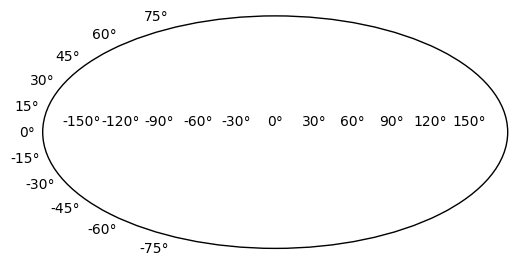

In [37]:
cNorm  = plt.matplotlib.colors.Normalize(vmin=0, vmax=3600)

ax = plt.axes(projection='mollweide')
plt.scatter(RA, DEC, s=1, c= df1['redshift']/10, cmap=plt.cm.rainbow,
            e)
plt.grid(True)

plt.title('Galaxy Locations using Redshift')
cb = plt.colorbar(cax=plt.axes([0.05, 0.1, 0.9, 0.05]),
                  orientation='horizontal',
                  ticks=np.linspace(0, 0.5, 6))
cb.set_label('redshift')
plt.show()

In [8]:
df.drop(df.columns[[0, 1, 2]], axis=1, inplace=True)

In [9]:
target = df['redshift']

In [10]:
df.drop('redshift', axis=1, inplace=True)

In [11]:
features = df.drop('specobjid', 1)

# Splitting the data into testing and traning set

In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.05, random_state=42)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


# R2 metric

In [12]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# Mean Squared Error

In [13]:


from sklearn.metrics import mean_squared_error

def mean_metric(y_test, pred):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = mean_squared_error(y_test, pred)
    
    # Return the score
    return score

# Random Forest Model with Performance

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train,y_train)
regressor.predict(X_test)

array([ 0.08733243, -0.00026795,  0.0416293 , ...,  0.15606749,
        0.02612117, -0.00044704])

In [28]:
score = performance_metric(y_test,regressor.predict(X_test) )
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.764.


In [29]:
score = mean_metric(y_test,regressor.predict(X_test) )
print ("Model has a Mean squared error {:.3f}.".format(score))

Model has a Mean squared error 0.043.


# Decision Tree Model and Performance

In [18]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
reg.predict(X_test)

array([ 3.22172 ,  2.06801 ,  0.588036, ...,  1.07391 ,  0.798376,
        0.891671])

In [19]:
score = performance_metric(y_test,reg.predict(X_test) )
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.500.


In [20]:
score = mean_metric(y_test,reg.predict(X_test) )
print ("Model has a Mean squared error {:.3f}.".format(score))

Model has a Mean squared error 0.355.


# Linear Regression Model and Performance

In [21]:
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression()
Lreg.fit(X_train,y_train)
Lreg.predict(X_test)

array([ 1.42779932,  1.39601022,  1.35936891, ...,  1.44599013,
        1.38941853,  1.41630034])

In [22]:
score = performance_metric(y_test,Lreg.predict(X_test) )
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.003.


In [23]:
score = mean_metric(y_test,Lreg.predict(X_test) )
print ("Model has a Mean squared error {:.3f}.".format(score))

Model has a Mean squared error 0.708.
